In [1]:
import geopandas as gpd
import pandas as pd # Tabular data
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", 500)
from glob import glob # Finding files
from tqdm.auto import tqdm # Progress bars
tqdm.pandas()
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import thread_map, process_map # Parallel processing
# Simpson diversity index
from skbio.diversity.alpha import simpson
files = sorted(glob("data/*.csv"))
print(len(files))

48


In [2]:
df = pd.concat(process_map(pd.read_csv, files))
df

  0%|          | 0/48 [00:00<?, ?it/s]

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
0,zzy-222@53r-msd-cwk,NaN,NaN,PROFLYTEC Insektenschutz systemtechnik,NaN,NaN,Home Furnishings Stores,NaN,4422.0,49.237125,10.957152,Spalter Straße 54,Abenberg,Bayern,91183,NaN,Blinds,NaN,NaN,2019-07,"[""proflytec.de""]",POLYGON,"POLYGON ((10.956793 49.237192, 10.957265 49.23...",OWNED_POLYGON,False,NaN,False,False,DE,834.0
1,22q-223@627-wdm-fvf,NaN,NaN,86 Fresh Cuts barber shop,NaN,NaN,Personal Care Services,"Hair, Nail, and Skin Care Services",81211.0,40.606801,-74.002175,1818 86th St Unit 3,Brooklyn,NY,11214,"{ ""Mon"": [[""9:45"", ""19:00""]], ""Tue"": [[""9:45"",...",Barber,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-74.00215897299995 40.60679270000003...,SHARED_POLYGON,False,1.347615e+10,False,False,US,1678.0
2,zzy-222@53d-4bp-7kf,NaN,NaN,Hotel Restaurant du Donon,NaN,NaN,Traveler Accommodation,Hotels (except Casino Hotels) and Motels,721110.0,48.636245,7.097949,57 Rue Pierre Marie,Abreschviller,Moselle,57560,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((7.098200450232434 48.6362644, 7.0981...",OWNED_POLYGON,False,3.338724e+10,True,NaN,FR,1236.0
3,zzy-222@65x-9cf-kcq,NaN,NaN,OC Transpo KANATA ROBSON,NaN,OC Transpo_s-f241b3mbh9-kanata~robson,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,45.314523,-75.918427,Kanata Robson,Kanata,ON,K2K,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
4,zzy-222@4xv-jmj-7t9,NaN,NaN,Zodiak,NaN,NaN,Drinking Places (Alcoholic Beverages),Drinking Places (Alcoholic Beverages),722410.0,50.143463,18.684148,Ul. Parkowa,Czerwionka-leszczyny,Silesian,44-230,NaN,"Bar or Pub,Late Night",NaN,NaN,2019-07,[],POLYGON,"POLYGON ((18.684408780693975 50.1434433, 18.68...",SHARED_POLYGON,False,4.860759e+10,True,NaN,PL,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701937,zzy-22b@5x6-rfw-vmk,NaN,NaN,TransLink PORT COQUITLAM STN BAY 6,NaN,NaN,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,49.261032,-122.774148,Port Coquitlam Stn Bay 6,Port Coquitlam,BC,V3C,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
701938,zzy-226@4zh-p7k-8jv,NaN,NaN,Er Med Tıbbi Cihazlar,NaN,NaN,Health and Personal Care Stores,Food (Health) Supplement Stores,446191.0,40.989680,29.050359,Eğitim Mah.,Istanbul,Istanbul,34722,NaN,Gourmet,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((29.050594369161516 40.9896682, 29.05...",SHARED_POLYGON,False,9.021655e+11,True,NaN,TR,1236.0
701939,222-223@5pv-fvr-3t9,NaN,NaN,Illinois Portable Toilets,NaN,NaN,Waste Management and Remediation Services,NaN,562.0,39.863271,-88.946319,800 E Garfield Ave,Decatur,IL,62526,NaN,Portable Toilet Services,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-88.94631519599994 39.86517597600004...,SHARED_POLYGON,False,1.217424e+10,False,False,US,19170.0
701940,zzy-222@62m-24b-p5f,NaN,NaN,Starbird Cemetery,NaN,1907880,Death Care Services,Cemeteries and Crematories,812220.0,44.072859,-69.912478,Starbird Cemetery,Bowdoin,ME,04287,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((-69.91224334425186 44.0728473, -69.9...",OWNED_POLYGON,False,NaN,True,NaN,US,1236.0


In [3]:
df.naics_code = df.naics_code.astype(str)

In [4]:
df.memory_usage().sum() / 1e9

6.18281856

In [5]:
# Retail Trade + Accommodation and Food Services
# See https://www.naics.com/search/
retail = df.naics_code.str.startswith(("44","45","72"))
retail.value_counts(dropna=False)

naics_code
False    16883611
True      8047109
Name: count, dtype: int64

In [6]:
# Drop non-retail
df = df[retail].copy()

In [7]:
df.top_category.value_counts()

top_category
Restaurants and Other Eating Places                                       2064637
Grocery Stores                                                             806273
Clothing Stores                                                            645688
Gasoline Stations                                                          450957
Health and Personal Care Stores                                            434557
Traveler Accommodation                                                     362986
Automobile Dealers                                                         283205
Drinking Places (Alcoholic Beverages)                                      281406
Specialty Food Stores                                                      248872
Furniture Stores                                                           238602
Electronics and Appliance Stores                                           213006
Home Furnishings Stores                                                    196289
Jew

In [8]:
top = df.top_category.value_counts().values
sub = df.sub_category.value_counts().values
simpson([1]), simpson([1,1]), simpson([1] *  100), simpson([1,2,3]), simpson(top), simpson(sub)

(0.0, 0.5, 0.99, 0.6111111111111112, 0.9002871633074666, 0.9432285872271319)

In [9]:
df.iso_country_code.value_counts()

iso_country_code
US    3405678
DE     682536
GB     637029
PL     601721
FR     378805
       ...   
GW          1
KP          1
IO          1
VA          1
MO          1
Name: count, Length: 203, dtype: int64

In [10]:
df[df.iso_country_code == "NZ"]

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
721,zzy-222@r3k-4k8-mrk,NaN,SG_BRAND_da46ad6f82825669a56b44d32564dff8,Domino's Pizza,Domino's Pizza,98696,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-44.693980,169.139663,34 Ardmore St,Wanaka,Otago,9305,"{ ""Mon"": [[""15:00"", ""21:00""]], ""Tue"": [[""15:00...","Counter Service,Pizza,Sandwich Shop,Lunch,Dinner",NaN,NaN,NaN,"[""dominos.nl""]",POLYGON,POLYGON ((169.13959041409075 -44.6940132612757...,OWNED_POLYGON,False,6.437468e+09,False,False,NZ,92.0
1485,zzy-222@r3k-wqv-7bk,NaN,SG_BRAND_0e24d4e00d6913d8,Z,Z,72,Gasoline Stations,Gasoline Stations with Convenience Stores,447110.0,-44.356122,171.251746,55 Sheffield Street,NaN,Canterbury,7910,"{ ""Mon"": [[""0:00"", ""24:00""]], ""Tue"": [[""0:00"",...","Propane,Car Wash,Tires,Coffee Shop,Oil Changes",NaN,NaN,2022-04,"[""z.co.nz""]",POLYGON,"POLYGON ((171.2520023149362 -44.3561007873296,...",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
9012,zzy-222@n84-d7c-w49,NaN,SG_BRAND_618343c29fedc43238864550bf2477a9,Ben & Jerry's,Ben & Jerry's,NZ006,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515.0,-36.728336,174.708589,219 Don Mckinnon Drive,Auckland,Auckland,0632,NaN,"Snacks,Counter Service,Ice Cream Shop,Catering...",NaN,NaN,2022-05,"[""benjerry.com.au""]",POLYGON,"POLYGON ((174.70883469023812 -36.7283493, 174....",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
9656,zzy-222@n7q-mhv-7yv,NaN,SG_BRAND_3df7453748507d4ea82277d2d0420de5,Armstrong Prestige Wellington,Volvo,NaN,Automobile Dealers,New Car Dealers,441110.0,-41.297874,174.781098,6 Barker Street Te Aro,Wellington,Wellington,6011,NaN,NaN,NaN,NaN,2022-05,"[""volvocars.com""]",POLYGON,POLYGON ((174.7812927730041 -41.29807298007156...,OWNED_POLYGON,False,6.443849e+09,False,False,NZ,1402.0
15220,zzy-222@r3k-9b8-v75,NaN,SG_BRAND_581e16e65ed8ffea,Countdown,Countdown,9442,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,-45.896727,170.509233,560 Andersons Bay Road,Dunedin,Otago,9012,"{ ""Mon"": [[""7:00"", ""22:00""]], ""Tue"": [[""7:00"",...","Chicken,Meats,Healthy Food,Seafood,Beverages",NaN,NaN,2021-12,"[""countdown.co.nz""]",POLYGON,"POLYGON ((170.50946769990549 -45.89671, 170.50...",OWNED_POLYGON,False,6.434663e+09,True,NaN,NZ,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682507,zzy-223@n84-d3d-9s5,NaN,SG_BRAND_de80593878cb1673c62a7f338dc7e4e1,Subway,Subway,22949-0,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-36.782082,174.721604,"Cnr Glenfield Rd & Downing St, Shop S504, Glen...","Glenfield, Auckland",Auckland,0629,"{ ""Mon"": [[""7:00"", ""21:30""]], ""Tue"": [[""7:00"",...","Counter Service,Sandwich Shop,Lunch,Breakfast,...",NaN,NaN,2022-05,"[""subway.com""]",POLYGON,POLYGON ((174.72154971915558 -36.7820225634601...,OWNED_POLYGON,False,6.494441e+09,False,False,NZ,113.0
686460,zzy-225@n85-knv-9j9,NaN,SG_BRAND_bcbed4ad551e5a55,Jay Jays,Jay Jays,36631,Clothing Stores,Children's and Infants' Clothing Stores,448130.0,-37.785422,175.281794,501 Victoria Street,Hamilton,Waikato,3204,NaN,NaN,NaN,NaN,2022-02,"[""jayjays.com.au""]",POLYGON,"POLYGON ((175.28202704056076 -37.7854, 175.282...",SHARED_POLYGON,False,NaN,True,NaN,NZ,1236.0
688716,zzy-222@n84-d5p-vfz,NaN,SG_BRAND_bd24e51034479e400ca242c0e7016c60,Pita Pit,Pita Pit,NaN,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-36.913484,174.840789,286 Mount Wellington Hwy,Auckland,Auckland,1060,"{ ""Mon"": [[""9:00"", ""19:00""]], ""Tue"": [[""9:00"",...","Counter Service,Sandwich Shop,Lunch,Fast Food,..."

In [11]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna(), ["opened_on", "closed_on"]]

,opened_on,closed_on
631,2022-05,2022-07
3245,2022-01,2022-05
5591,2020-09,2020-10
5599,2021-08,2022-04
7074,2020-01,2020-07
...,...,...
685944,2020-01,2020-02
685997,2021-04,2021-07
687470,2021-05,2021-08
689423,2021-05,2021-06


<Axes: >

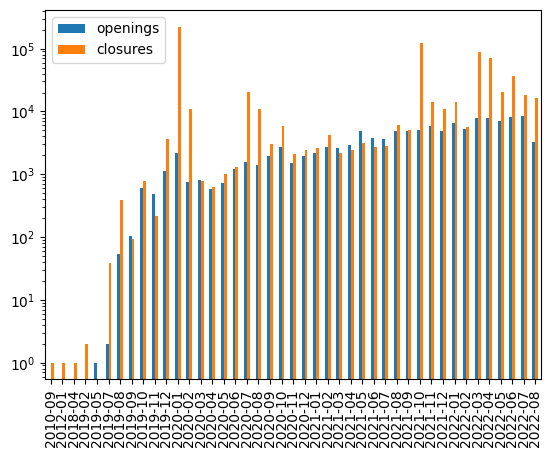

In [12]:
open_close_df = pd.DataFrame({
    "openings": df.opened_on.value_counts(), 
    "closures": df.closed_on.value_counts()
})
open_close_df.plot.bar(logy=True)

In [13]:
# See https://docs.safegraph.com/docs/places-rich-attributes#section-determining-when-poi-open-and-close
start_date = "2020-03"
end_date = "2023-03"
df["open_pre_pandemic"] = (df.opened_on.isna() | (df.opened_on < start_date)) & (df.closed_on.isna() | (df.closed_on > start_date))
df["open_post_pandemic"] = (df.opened_on.isna() | (df.opened_on < end_date)) & (df.closed_on.isna() | (df.closed_on > end_date))
pre_retail = sum(df.open_pre_pandemic)
post_retail = sum(df.open_post_pandemic)
print(f"Globally, there were {pre_retail} retail locations open prior to {start_date}, and {post_retail} retail locations open after {end_date}.")
delta = post_retail - pre_retail
print(f"This is an change of {delta}, which is {delta/pre_retail:.2%}")

Globally, there were 7689347 retail locations open prior to 2020-03, and 7309895 retail locations open after 2023-03.
This is an change of -379452, which is -4.93%


In [14]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna() & df.open_pre_pandemic & ~df.open_post_pandemic, ["opened_on", "closed_on", "open_pre_pandemic", "open_post_pandemic"]]

,opened_on,closed_on,open_pre_pandemic,open_post_pandemic
7074,2020-01,2020-07,True,False
19669,2020-01,2020-10,True,False
28664,2019-08,2022-06,True,False
92683,2019-10,2022-01,True,False
118871,2020-02,2021-01,True,False
...,...,...,...,...
422334,2020-01,2021-04,True,False
424056,2020-01,2020-10,True,False
447521,2019-11,2022-07,True,False
512440,2020-01,2020-10,True,False


In [15]:
def calculate_metrics(group):
    open_pre_pandemic = sum(group.open_pre_pandemic)
    open_post_pandemic = sum(group.open_post_pandemic)
    delta = open_post_pandemic - open_pre_pandemic
    if open_pre_pandemic:
        percentage_change = delta / open_pre_pandemic * 100
    else:
        percentage_change = pd.NA
    return pd.Series({
        "n_open_pre_pandemic": open_pre_pandemic,
        "n_open_post_pandemic": open_post_pandemic,
        "delta": delta,
        "percentage_change": percentage_change,
        "diversity_pre_pandemic_top_category": simpson(group.top_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_top_category": simpson(group.top_category[group.open_post_pandemic].value_counts().values),
        "diversity_pre_pandemic_sub_category": simpson(group.sub_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_sub_category": simpson(group.sub_category[group.open_post_pandemic].value_counts().values),
    })
by_country = df.groupby("iso_country_code").apply(calculate_metrics)
by_country.sort_values(by="n_open_pre_pandemic", ascending=False)

,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
iso_country_code,,,,,,,,
US,3092324.0,2744935.0,-347389.0,-11.233913,0.876914,0.883671,0.934108,0.939819
DE,680608.0,681040.0,432.0,0.063473,0.870606,0.870619,0.945001,0.944917
GB,628015.0,628244.0,229.0,0.036464,0.914882,0.914535,0.939968,0.937962
PL,600086.0,601320.0,1234.0,0.205637,0.843966,0.843567,0.792917,0.793637
FR,377229.0,377946.0,717.0,0.190070,0.899384,0.899539,0.922000,0.922238
...,...,...,...,...,...,...,...,...
MO,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
VA,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
GW,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
display((by_country.diversity_post_pandemic_top_category - by_country.diversity_pre_pandemic_top_category).describe())
(by_country.diversity_post_pandemic_sub_category - by_country.diversity_pre_pandemic_sub_category).describe()

count    203.000000
mean      -0.000784
std        0.011740
min       -0.081407
25%       -0.000788
50%        0.000000
75%        0.000152
max        0.070248
dtype: float64

count    203.000000
mean      -0.000677
std        0.011857
min       -0.081407
25%       -0.000385
50%        0.000000
75%        0.000519
max        0.070248
dtype: float64

In [17]:
by_region = df.groupby(["region", "iso_country_code"]).apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_region.head(50)

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
868,CA,US,416273.0,360695.0,-55578.0,-13.351334,0.867385,0.874593,0.928270,0.934822
4264,TX,US,262633.0,237198.0,-25435.0,-9.684617,0.869706,0.875466,0.931412,0.936409
1450,FL,US,213248.0,188404.0,-24844.0,-11.650285,0.881826,0.889708,0.933351,0.940037
2963,NY,US,211005.0,179737.0,-31268.0,-14.818606,0.848928,0.860830,0.914181,0.923937
3101,Nordrhein-Westfalen,DE,129345.0,129356.0,11.0,0.008504,0.871334,0.871303,0.946296,0.946262
3195,ON,CA,121184.0,102886.0,-18298.0,-15.099353,0.870269,0.884327,0.930433,0.941741
663,Bayern,DE,118823.0,118894.0,71.0,0.059753,0.869688,0.869776,0.942899,0.942819
3283,PA,US,113479.0,100450.0,-13029.0,-11.481419,0.877503,0.886084,0.929963,0.937012
1864,IL,US,107872.0,94209.0,-13663.0,-12.665937,0.867506,0.875265,0.928671,0.935908
1525,GA,US,96476.0,87519.0,-8957.0,-9.284174,0.880348,0.885255,0.934973,0.939063


In [18]:
display((by_region.diversity_post_pandemic_top_category - by_region.diversity_pre_pandemic_top_category).describe())
(by_region.diversity_post_pandemic_sub_category - by_region.diversity_pre_pandemic_sub_category).describe()

count    5183.000000
mean       -0.009436
std         0.148929
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

count    5183.000000
mean       -0.009166
std         0.148606
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

In [19]:
vc = (df.city + "," + df.iso_country_code).value_counts()
cities = vc.index[vc > 1000]
cities

Index(['London,GB', 'Istanbul,TR', 'New York,US', 'Los Angeles,US',
       'Houston,US', 'Berlin,DE', 'Warsaw,PL', 'Paris,FR', 'Madrid,ES',
       'Chicago,US',
       ...
       'Krosno,PL', 'Greenfield,US', 'Kirkland,US', 'Metz,FR', 'Aarhus,DK',
       'Stafford,US', 'Slidell,US', 'Głogów,PL', 'Jefferson,US',
       'Murrieta,US'],
      dtype='object', length=1161)

In [20]:
by_city = df[(df.city + "," + df.iso_country_code).isin(cities)].groupby(["city", "iso_country_code"]).progress_apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_city.head(50)

  0%|          | 0/1161 [00:00<?, ?it/s]

,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
552,London,GB,65415.0,65138.0,-277.0,-0.423450,0.861749,0.861675,0.924843,0.923046
447,Istanbul,TR,58286.0,58417.0,131.0,0.224754,0.884211,0.883827,0.919957,0.920173
674,New York,US,42940.0,34088.0,-8852.0,-20.614811,0.827086,0.844070,0.897520,0.911432
558,Los Angeles,US,36475.0,30430.0,-6045.0,-16.572995,0.860566,0.867507,0.914876,0.921685
84,Berlin,DE,35687.0,35741.0,54.0,0.151316,0.810666,0.810926,0.943929,0.943986
1078,Warsaw,PL,35664.0,35670.0,6.0,0.016824,0.900922,0.900906,0.894088,0.894136
755,Paris,FR,34823.0,34829.0,6.0,0.017230,0.825651,0.825934,0.857662,0.857844
426,Houston,US,32799.0,28879.0,-3920.0,-11.951584,0.863507,0.871515,0.923475,0.930224
576,Madrid,ES,29045.0,29097.0,52.0,0.179033,0.874910,0.874407,0.911049,0.911252
188,Chicago,US,25289.0,20702.0,-4587.0,-18.138321,0.808858,0.825291,0.891278,0.906399


In [21]:
display((by_city.diversity_post_pandemic_top_category - by_city.diversity_pre_pandemic_top_category).describe())
(by_city.diversity_post_pandemic_sub_category - by_city.diversity_pre_pandemic_sub_category).describe()

count    1161.000000
mean        0.003544
std         0.006617
min        -0.127079
25%        -0.000084
50%         0.001406
75%         0.006573
max         0.034889
dtype: float64

count    1161.000000
mean        0.002922
std         0.005758
min        -0.127079
25%         0.000081
50%         0.002009
75%         0.005464
max         0.026849
dtype: float64

In [22]:
by_region[by_region.iso_country_code == "NZ"]

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
503,Auckland,NZ,1413.0,1433.0,20.0,1.415428,0.793828,0.796033,0.854361,0.857658
938,Canterbury,NZ,603.0,614.0,11.0,1.824212,0.781713,0.785727,0.858730,0.860996
4674,Waikato,NZ,490.0,501.0,11.0,2.244898,0.760233,0.768818,0.853003,0.857646
4685,Wellington,NZ,431.0,434.0,3.0,0.696056,0.814251,0.816220,0.868234,0.870787
3266,Otago,NZ,285.0,291.0,6.0,2.105263,0.802167,0.807973,0.876553,0.879701
...,...,...,...,...,...,...,...,...,...,...
2966,NZ-BOP,NZ,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2967,NZ-WGN,NZ,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3048,Newlands,NZ,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4664,WAIKATO,NZ,0.0,1.0,1.0,<NA>,1.000000,0.000000,1.000000,0.000000


In [23]:
tourist_cities = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors")[0]
tourist_cities

,Rank (Euromonitor),Rank (Mastercard),City,Country / Territory,Arrivals 2018 (Euromonitor),Arrivals 2016 (Mastercard),Growth in arrivals (Euromonitor),Income (billions $) (Mastercard)
0,1.0,11.0,Hong Kong,Hong Kong,29262700,8370000.0,5.0%,6.84
1,2.0,1.0,Bangkok,Thailand,24177500,21470000.0,7.7%,14.84
2,3.0,2.0,London,United Kingdom,19233000,19880000.0,−3.0%,19.76
3,4.0,NaN,Macau,Macau,18931400,NaN,9.2%,NaN
4,5.0,6.0,Singapore,Singapore,18551200,12110000.0,5.3%,12.54
...,...,...,...,...,...,...,...,...
134,NaN,94.0,Accra,Ghana,NaN,760000.0,NaN,0.53
135,NaN,95.0,Quito,Ecuador,NaN,750000.0,NaN,0.42
136,NaN,96.0,Tianjin,China,NaN,750000.0,NaN,2.24
137,NaN,98.0,Qingdao,China,NaN,730000.0,NaN,0.53


In [24]:
by_city = df[df.city.isin(tourist_cities.City)].groupby(["city", "iso_country_code"]).progress_apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_city

  0%|          | 0/304 [00:00<?, ?it/s]

,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
146,London,GB,65415.0,65138.0,-277.0,-0.42345,0.861749,0.861675,0.924843,0.923046
112,Istanbul,TR,58286.0,58417.0,131.0,0.224754,0.884211,0.883827,0.919957,0.920173
151,Los Angeles,US,36475.0,30430.0,-6045.0,-16.572995,0.860566,0.867507,0.914876,0.921685
21,Berlin,DE,35687.0,35741.0,54.0,0.151316,0.810666,0.810926,0.943929,0.943986
294,Warsaw,PL,35664.0,35670.0,6.0,0.016824,0.900922,0.900906,0.894088,0.894136
...,...,...,...,...,...,...,...,...,...,...
111,Istanbul,TM,0.0,1.0,1.0,NaN,1.000000,0.000000,1.000000,0.000000
274,São Paulo,AO,0.0,1.0,1.0,NaN,1.000000,0.000000,1.000000,0.000000
236,Riyadh,ZA,0.0,1.0,1.0,NaN,1.000000,0.000000,1.000000,0.000000
139,Lima,PA,0.0,3.0,3.0,NaN,1.000000,0.000000,1.000000,0.000000


In [25]:
by_city = by_city[by_city.n_open_pre_pandemic > 100]
display((by_city.diversity_post_pandemic_top_category - by_city.diversity_pre_pandemic_top_category).describe())
(by_city.diversity_post_pandemic_sub_category - by_city.diversity_pre_pandemic_sub_category).describe()

count    138.000000
mean       0.001881
std        0.007496
min       -0.032106
25%       -0.000593
50%        0.000164
75%        0.004481
max        0.034889
dtype: float64

count    138.000000
mean       0.001503
std        0.006167
min       -0.024290
25%       -0.000835
50%        0.000372
75%        0.003683
max        0.026849
dtype: float64

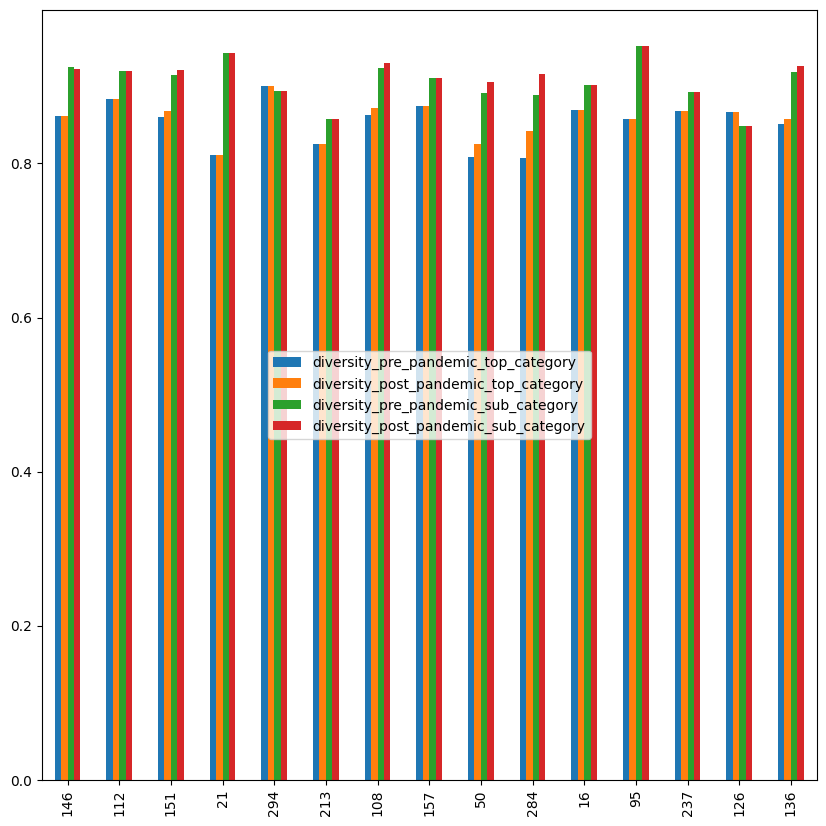

In [26]:
by_city[["diversity_pre_pandemic_top_category", "diversity_post_pandemic_top_category", "diversity_pre_pandemic_sub_category", "diversity_post_pandemic_sub_category"]].head(15).plot.bar(figsize=(10,10))
plt.legend(loc='center')

In [27]:
tourism = pd.read_excel("tourism_arrivals_bycountry.xlsx", skiprows=1).set_index("Region")
tourism

,Albania,Argentina,Australia,Austria,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,Chile,Colombia,Croatia,Cyprus,Egypt,Estonia,European Union,Finland,Germany,Greece,Hong Kong SAR (China),India,Indonesia,Israel,Italy,Japan,South Korea,Kosovo,Kuwait,Laos,Latvia,Lebanon,Macau SAR (China),North Macedonia,Malaysia,Malta,Mauritius,Mexico,Montenegro,Morocco,Nepal,Netherlands,New Zealand,Panama,Paraguay,Peru,Philippines,Qatar,Romania,Serbia,Singapore,Slovenia,Spain,Sri Lanka,State of Palestine (West Bank and Gaza),Switzerland,Taiwan,Thailand,Tunisia,Turkey,United Kingdom,United States,Vietnam,Yemen
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,222258,269781,702580,2686800,39398,1067389.0,544013,885966,521062.0,362899,122608,75867.000000,712342.0,118225,17358564,260618,2155389,6.034740e+05,2420760,1045027,1097839,257068,2276705,2501409,936774,NaN,14999.0,358248.0,103651,304926.0,1483107,30253,2276750,124769.350208,120974,3338908,18221.0,431349.0,73187,1052000,365452,179544,156478.0,366507,724586.0,189376,695653,81442,1247272,181226,4106601,238924,36180.0,592420,872294,3531483,295994,1456565,2.734127e+06,5929209,1430242,NaN
2018-02-01,182121,196019,914530,3148200,37257,868482.0,457420,980466,408926.0,344234,137156,101481.000000,729234.0,115203,19231425,247018,2354160,4.841230e+05,2301456,1049259,1197503,299644,2790174,2509297,1028495,NaN,15413.0,347227.0,88592,281307.0,1396068,26519,2050613,122433.263011,115600,3228459,19911.0,481441.0,89507,1073000,409680,155080,123457.0,347444,669640.0,158248,634544,77627,1158955,153150,4218047,235618,46585.0,636235,850762,3552119,313364,1522544,2.572506e+06,5255134,1431845,NaN
2018-03-01,242176,216210,872350,3004400,55144,728742.0,524291,1187855,373693.0,363852,321555,192090.000000,941787.0,132668,24476567,241207,2673252,7.081690e+05,2302539,1021539,1363426,393072,3832087,2607956,1342349,NaN,17428.0,362221.0,112363,341978.0,1451263,36733,2192855,167197.473227,119841,3995908,27869.0,625284.0,124686,1401000,373575,168446,99434.0,366473,635485.0,187678,797950,104541,1164100,221453,5393186,233382,51200.0,757347,1013655,3494645,450138,2133293,3.240040e+06,6663070,1343314,NaN
2018-04-01,334972,217364,679780,1552900,93739,435415.0,701887,1144830,303560.0,332549,783341,314143.000000,987282.0,150542,28854792,174820,3084501,1.106808e+06,2396967,745033,1302321,408882,4843554,2900718,1307779,NaN,16684.0,376133.0,142299,369956.0,1541771,59057,1957248,233520.438330,104967,3295425,60453.0,632117.0,98650,1834000,271206,144226,89843.0,344011,583996.0,161896,863234,128379,1169082,289982,6780378,180429,65955.0,721784,883072,3096067,467102,2640454,3.403905e+06,6929931,1341913,NaN
2018-05-01,377657,190985,609450,2067400,109368,341310.0,938642,1773713,220463.0,312442,1442983,450495.000000,818992.0,202176,38689104,213104,3357981,2.449690e+06,2241353,606513,1242705,396126,7175532,2675052,1214769,NaN,15220.0,339165.0,184405,341398.0,1449431,72627,1976981,256878.937558,101138,3285945,97202.0,471967.0,68825,1882000,208639,137570,76843.0,356655,531175.0,131364,983165,163466,1143859,391556,8086048,129466,59706.0,904155,842241,2737834,528305,3639663,3.613685e+06,6768050,1161114,NaN
2018-06-01,481585,175448,646650,2450400,106766,302154.0,1550446,2705943,200605.0,303705,2393940,511073.000000,855040.0,231427,43328382,330297,3670431,4.103702e+06,2193050,683935,1322674,310835,7301385,2704631,1260730,NaN,16046.0,344286.0,211558,456563.0,1445431,76374,2275921,257544.634582,84345,3481515,130676.0,520623.0,65159,1717000,199349,138699,77800.0,355591,524765.0,116127,1132916,164491,1159131,462806,8554306,146828,41796.0,1110165,857578,3013304,590931,4463483,3.503299e+06,6372295,1183040,NaN
2018-07-01,993844,234389,774360,3782400,136370,448317.0,2152833,3210249,251738.0,363551,4067804,539626.000000,1101083.0,304995,55669014,396765,4708654,5.539244e+06,2511990,806493,1547231,293910,9254700,2832040,1235271,NaN,17988.0,282602.0,268179,577552.0,1636904,99337,2305324,289182.546120,115881,3647841,164679.0,616908.0,7

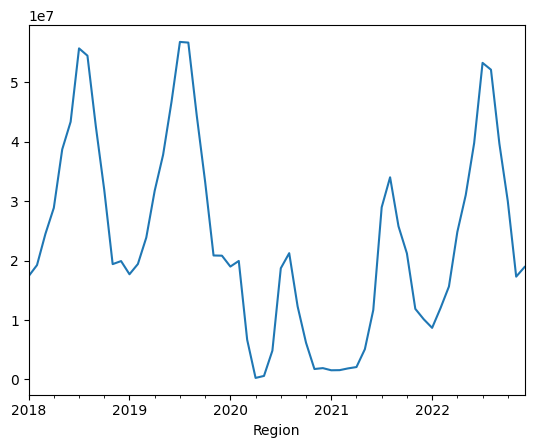

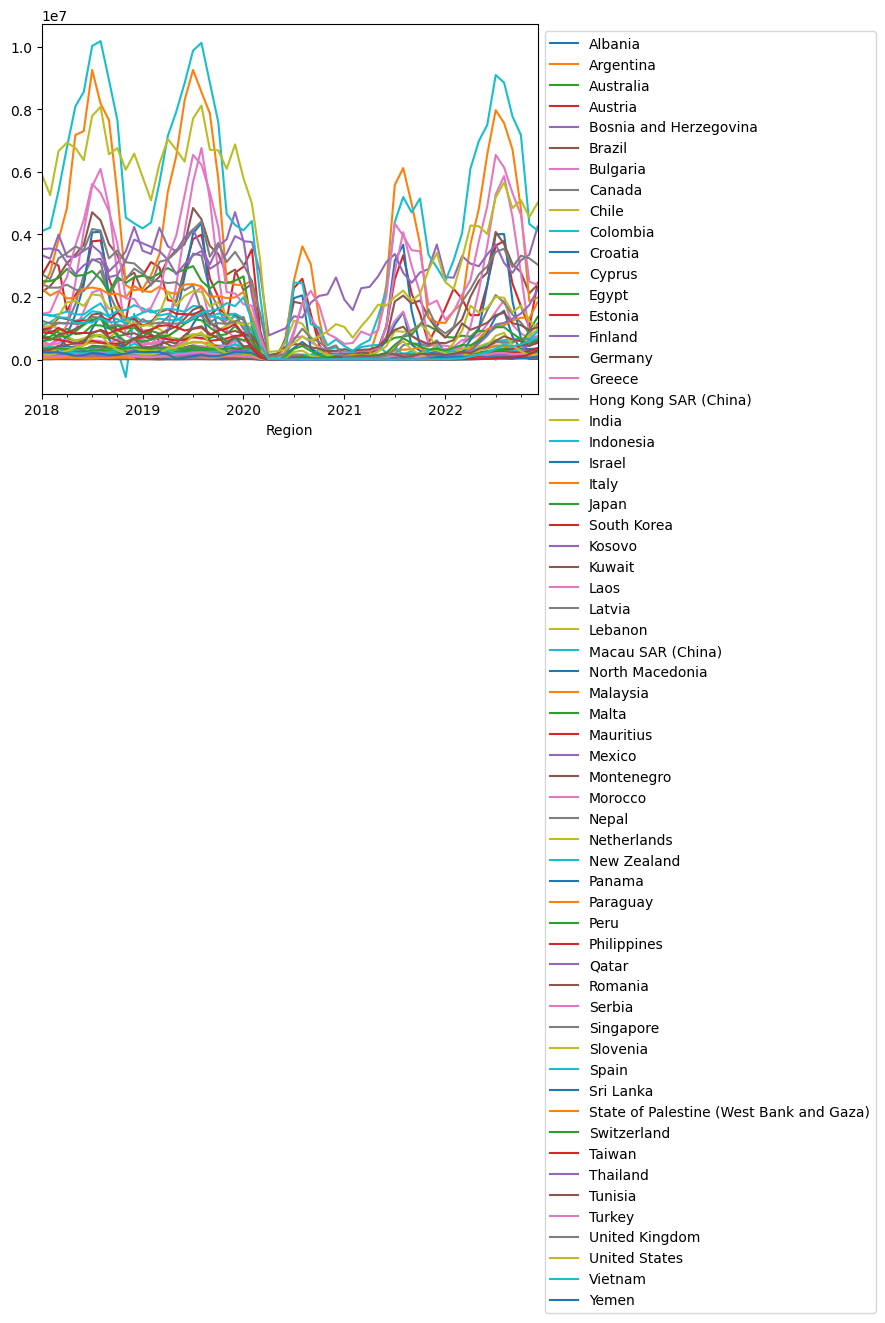

In [28]:
tourism["European Union"].plot()
tourism.drop(columns="European Union").plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

<Axes: xlabel='Region'>

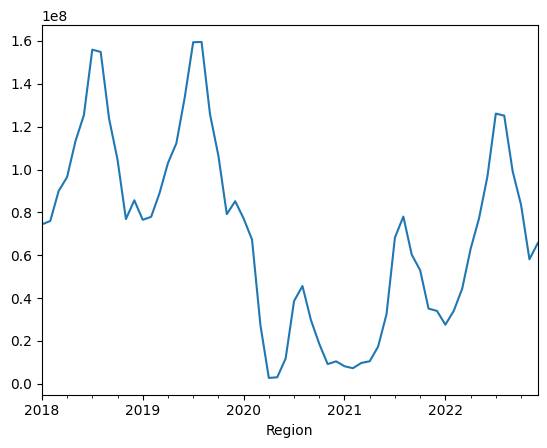

In [29]:
tourism.sum(axis=1).plot()

In [30]:
totals = tourism.sum(axis=0).sort_values(ascending=False)
totals

European Union                             1.417826e+09
Spain                                      2.880908e+08
United States                              2.516396e+08
Italy                                      2.219049e+08
Mexico                                     1.808067e+08
                                               ...     
North Macedonia                            2.414543e+06
State of Palestine (West Bank and Gaza)    6.537440e+05
Kuwait                                     5.244920e+05
Kosovo                                     3.773500e+05
Yemen                                      0.000000e+00
Length: 62, dtype: float64

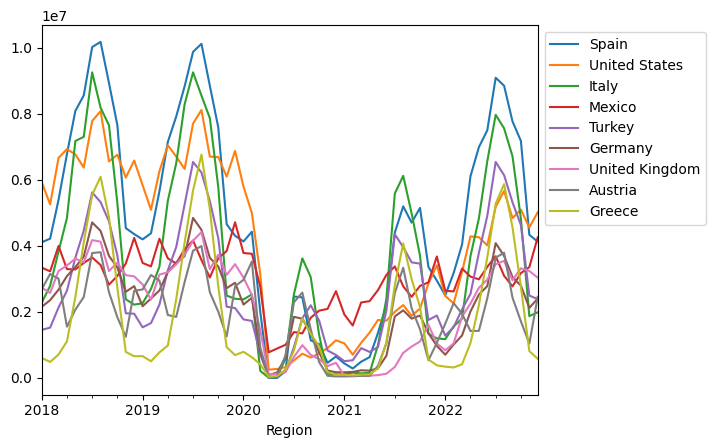

In [31]:
tourism[totals.index[1:10]].plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [32]:
by_country.loc["ES"]

n_open_pre_pandemic                     300459.000000
n_open_post_pandemic                    301113.000000
delta                                      654.000000
percentage_change                            0.217667
diversity_pre_pandemic_top_category          0.903311
diversity_post_pandemic_top_category         0.903060
diversity_pre_pandemic_sub_category          0.929134
diversity_post_pandemic_sub_category         0.929316
Name: ES, dtype: float64

In [33]:
tourism["Spain"]

Region
2018-01-01     4106601
2018-02-01     4218047
2018-03-01     5393186
2018-04-01     6780378
2018-05-01     8086048
2018-06-01     8554306
2018-07-01    10020246
2018-08-01    10175761
2018-09-01     8932308
2018-10-01     7649860
2018-11-01     4536873
2018-12-01     4354798
2019-01-01     4195641
2019-02-01     4380504
2019-03-01     5649577
2019-04-01     7146033
2019-05-01     7919204
2019-06-01     8833893
2019-07-01     9873270
2019-08-01    10118366
2019-09-01     8845152
2019-10-01     7587749
2019-11-01     4655021
2019-12-01     4304741
2020-01-01     4133024
2020-02-01     4427344
2020-03-01     1997262
2020-04-01           0
2020-05-01           0
2020-06-01      204272
2020-07-01     2464779
2020-08-01     2440978
2020-09-01     1138868
2020-10-01     1020773
2020-11-01      456814
2020-12-01      648989
2021-01-01      437973
2021-02-01      284974
2021-03-01      491427
2021-04-01      629206
2021-05-01     1363164
2021-06-01     2216356
2021-07-01     4398992
2021

In [43]:
city_locations = pd.read_json("cities.json").drop_duplicates(subset=["name", "country"])
city_locations

,country,name,lat,lng
0,AD,Sant Julià de Lòria,42.46372,1.49129
1,AD,Pas de la Casa,42.54277,1.73361
2,AD,Ordino,42.55623,1.53319
3,AD,les Escaldes,42.50729,1.53414
4,AD,la Massana,42.54499,1.51483
...,...,...,...,...
141083,ZW,Beitbridge,-22.21667,30.00000
141084,ZW,Beatrice,-18.25283,30.84730
141085,ZW,Banket,-17.38333,30.40000
141086,ZW,Epworth,-17.89000,31.14750


In [47]:
by_city_geocoded = pd.merge(by_city, city_locations, how='inner', left_on=['city','iso_country_code'], right_on = ['name','country'])
by_city_geocoded

,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category,country,name,lat,lng
0,London,GB,65415.0,65138.0,-277.0,-0.42345,0.861749,0.861675,0.924843,0.923046,GB,London,51.50853,-0.12574
1,Istanbul,TR,58286.0,58417.0,131.0,0.224754,0.884211,0.883827,0.919957,0.920173,TR,Istanbul,41.01384,28.94966
2,Los Angeles,US,36475.0,30430.0,-6045.0,-16.572995,0.860566,0.867507,0.914876,0.921685,US,Los Angeles,34.05223,-118.24368
3,Berlin,DE,35687.0,35741.0,54.0,0.151316,0.810666,0.810926,0.943929,0.943986,DE,Berlin,52.52437,13.41053
4,Warsaw,PL,35664.0,35670.0,6.0,0.016824,0.900922,0.900906,0.894088,0.894136,PL,Warsaw,52.22977,21.01178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Kyoto,JP,126.0,127.0,1.0,0.793651,0.740363,0.739537,0.834089,0.837126,JP,Kyoto,35.02107,135.75385
125,Xiamen,CN,118.0,117.0,-1.0,-0.847458,0.782103,0.790854,0.835679,0.839506,CN,Xiamen,24.47979,118.08187
126,Fukuoka,JP,111.0,118.0,7.0,6.306306,0.731109,0.727952,0.833374,0.830508,JP,Fukuoka,33.60000,130.41667
127,Tel Aviv,IL,108.0,111.0,3.0,2.777778,0.742455,0.753997,0.817044,0.827855,IL,Tel Aviv,32.08088,34.78057


In [48]:
by_city_geocoded.to_csv("by_city_geocoded.csv", index=False)